In [220]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.io 
import scipy.misc
from scipy import linalg

import random
from random import sample

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'data/ex7data2.mat'
mat = scipy.io.loadmat(data)
X = mat['X']

# KMEANS CLUSTERING

## 1.1.1 Finding optimum num of centroids

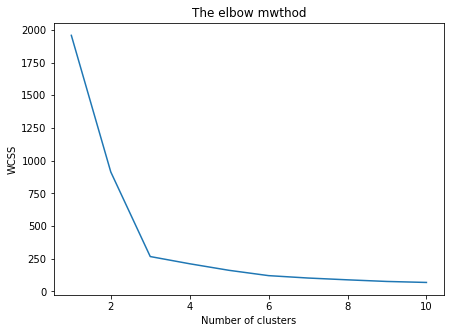

In [217]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.rcParams['figure.figsize'] = 7,5
plt.plot(range(1,11), wcss)
plt.title('The elbow mwthod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
K = 3
initial_centroids = []
rand = random.sample(range(X.shape[0]),K)
for i in rand:
    initial_centroids.append(list(X[i]))

In [189]:
#Visualizing Data
def plotData(X, centroids, idxs=None):
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert X[0].shape == np.shape(centroids[0][0])
    assert np.shape(centroids[-1])[0] <= len(colors)
    
    #if Idxs is supplied, divide up X into colors ------------------------------------
    if idxs is not None:
        assert idxs.shape[0] == X.shape[0]
        subX = []
        for x in np.arange(centroids[0].shape[0]):
        #for x in np.arange(np.arange(np.shape(centroids)[0])):
            subX.append(np.array([X[i] for i in np.arange(X.shape[0]) if idxs[i] == x]))
            #get 3 data first on X into subX
    else:
        subX = [X]
    #---------------------------------------------------------------------------------
    
    #plotting data
    fig = plt.figure(figsize=(7,5))
    for x in np.arange(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0], newX[:,1], 'o',color=colors[x],
                alpha=0.75, label='Data Points')
        plt.xlabel('x1', fontsize = 14)
        plt.ylabel('x2', fontsize = 14)
        plt.title('Plot of X points', fontsize=16)
        plt.grid(True)

    #Drawing a history of centroid movement
    #Drawing the centroid--------------------------------
    tempx, tempy = [],[]
    for centroid in centroids:
        tempx.append(centroid[:][0])
        tempy.append(centroid[:][1])

    for x in np.arange(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

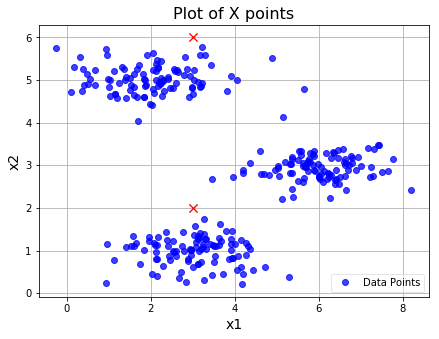

In [190]:
plotData(X,[initial_centroids])

## 1.1.2 Finding closest centroids

In [207]:
def distanceSquared(point1, point2):
    assert np.shape(point1) == np.shape(point2)
    return np.sum(np.square(point2-point1))
                  
def findClosestCentroids(myX, myCentroids):
    idxs = np.zeros((myX.shape[0],1))
                  
    #loop through each data pint in X
    for x in np.arange(idxs.shape[0]):
        mypoint = myX[x]
                  
        #Compare this point to each centroid
        #keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in np.arange(np.shape(myCentroids)[0]):
            mycentroid = myCentroids[i]
            distSquared = distanceSquared(mycentroid,mypoint)
            if distSquared < mindist : 
                mindist = distSquared
                idx = i
                
        #with the best index found, modift the result idx vector
        idxs[x] = idx
        
    return idxs

In [208]:
idxs = findClosestCentroids(X, initial_centroids)
print (idxs[:3].flatten())

[0. 2. 1.]


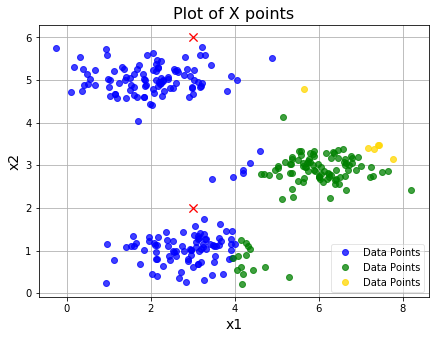

In [209]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
plotData(X,[initial_centroids],idxs)

## 1.1.3 Computing centroid means

In [210]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for x in np.arange(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in np.arange(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

# 1.2 _K_-means on example dataset

In [211]:
def runKMeans(myX, initial_centroids, K, n_iter):
    """
    Function that actually does the iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in np.arange(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [212]:
idxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

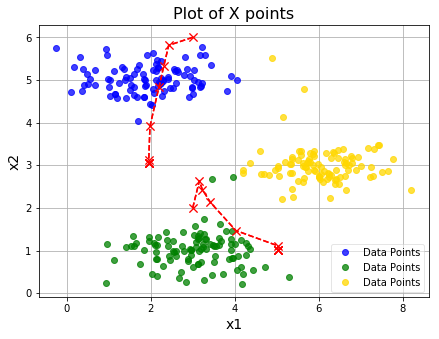

In [213]:
plotData(X,centroid_history,idxs)

# 1.3 Random initialization

In [215]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])    

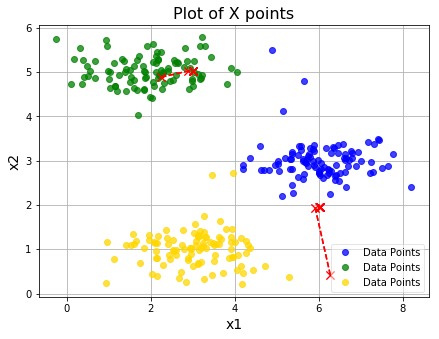

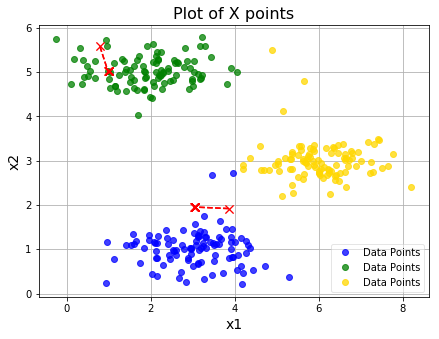

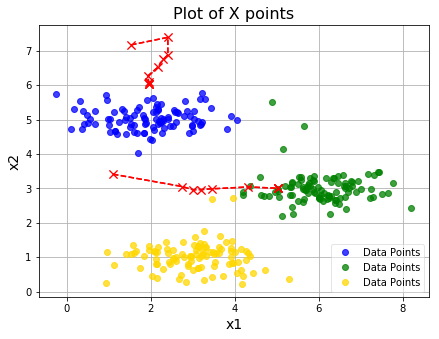

In [216]:
#Let's choose random initial centroids and see the resulting 
#centroid progression plot.. perhaps three times in a row
for x in np.arange(3):
    idxs, centroid_history = runKMeans(X,chooseKRandomCentroids(X,K=3),
                                       K=3,n_iter=10)
    plotData(X,centroid_history,idxs)

#  IMAGE  COMPRESSION - KMeans

A shape is  (128, 128, 3)


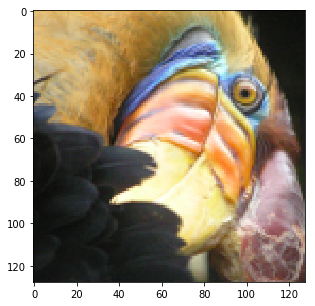

In [221]:
datafile = 'data/bird_small.png'

# This creates a three-dimensional matrix A whose first two indices 
# identify a pixel position and whose last index represents red, green, or blue.
A = scipy.misc.imread(datafile)

print ("A shape is ",A.shape)
dummy = plt.imshow(A)

In [222]:
# Divide every entry in A by 255 so all values are in the range of 0 to 1
A = A / 255.

# Unroll the image to shape (16384,3) (16384 is 128*128)
A = A.reshape(-1, 3)

# Run k-means on this data, forming 16 clusters, with random initialization
myK = 16
idxs, centroid_history = runKMeans(A,chooseKRandomCentroids(A,myK),
                                   myK,n_iter=10)

In [223]:
# Now I have 16 centroids, each representing a color.
# Let's assign an index to each pixel in the original image dictating
# which of the 16 colors it should be
idxs = findClosestCentroids(A, centroid_history[-1])

In [224]:
final_centroids = centroid_history[-1]
# Now loop through the original image and form a new image
# that only has 16 colors in it
final_image = np.zeros((idxs.shape[0],3))
for x in np.arange(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

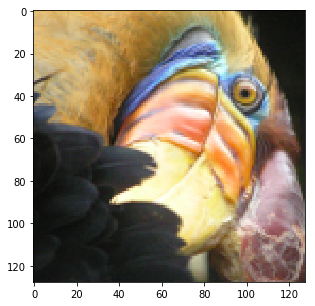

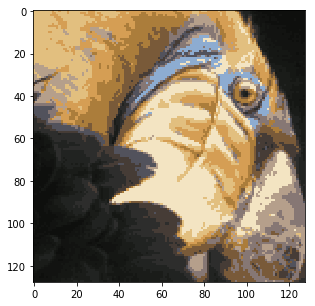

In [225]:
# Reshape the original image and the new, final image and draw them
# To see what the "compressed" image looks like
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
plt.figure()
dummy = plt.imshow(final_image.reshape(128,128,3))